# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Shopee_1.csv")
df.head()

,userName,score,at,content
0,Kusumjaywati,1,2024-04-28 03:55:09,"Apk gak jelas di bukak malah keluar"" sendiri"
1,Baray Wijaya,3,2024-04-28 03:54:35,Kenapa shoppe saya di buka terus kembali kelua...
2,•TMBL _noob,4,2024-04-28 03:54:04,"Apa cuma saya aja, setiap buka shoee sering ke..."
3,ShafiraDN,1,2024-04-28 03:53:55,Semenjak di update makin banyak bug. Baru masu...
4,baper gaming,1,2024-04-28 03:53:55,Payah mau belanja apk nya sekarang suka close ...


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,"Apk gak jelas di bukak malah keluar"" sendiri",Kusumjaywati,2024-04-28 03:55:09
1,Kenapa shoppe saya di buka terus kembali kelua...,Baray Wijaya,2024-04-28 03:54:35
2,"Apa cuma saya aja, setiap buka shoee sering ke...",•TMBL _noob,2024-04-28 03:54:04
3,Semenjak di update makin banyak bug. Baru masu...,ShafiraDN,2024-04-28 03:53:55
4,Payah mau belanja apk nya sekarang suka close ...,baper gaming,2024-04-28 03:53:55
...,...,...,...
393,Makin lama makin jelekkkkk,Imade Artawan,2024-04-27 21:18:16
394,Update terbaru malah sering force close. Kenapa?!,Bung Ryo,2024-04-27 21:17:59
395,Iklan shopee SEKARANG MAKIN TIDAK TERATUR... K...,Husni Alfiansyah,2024-04-27 21:15:01
396,Kenapa spaylater saya limit kadaluarsa terus,RRQ Hoshi,2024-04-27 21:13:40


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   398 non-null    object
 1   userName  398 non-null    object
 2   at        398 non-null    object
dtypes: object(3)
memory usage: 9.5+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,398,398,398
unique,383,398,396
top,Bagus,Kusumjaywati,2024-04-28 03:53:55
freq,5,1,2


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(398, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(383, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,apk gak jelas di bukak malah keluar sendiri,Kusumjaywati,2024-04-28 03:55:09
1,kenapa shoppe saya di buka terus kembali kelua...,Baray Wijaya,2024-04-28 03:54:35
2,apa cuma saya aja setiap buka shoee sering kep...,•TMBL _noob,2024-04-28 03:54:04
3,semenjak di update makin banyak bug baru masuk...,ShafiraDN,2024-04-28 03:53:55
4,payah mau belanja apk nya sekarang suka close ...,baper gaming,2024-04-28 03:53:55
...,...,...,...
393,makin lama makin jelekkkkk,Imade Artawan,2024-04-27 21:18:16
394,update terbaru malah sering force close kenapa,Bung Ryo,2024-04-27 21:17:59
395,iklan shopee sekarang makin tidak teratur kala...,Husni Alfiansyah,2024-04-27 21:15:01
396,kenapa spaylater saya limit kadaluarsa terus,RRQ Hoshi,2024-04-27 21:13:40


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,aplikasi tidak jelas di bukak malah keluar sen...,Kusumjaywati,2024-04-28 03:55:09
1,kenapa shoppe saya di buka terus kembali kelua...,Baray Wijaya,2024-04-28 03:54:35
2,apa cuma saya aja setiap buka shoee sering kep...,•TMBL _noob,2024-04-28 03:54:04
3,semenjak di update makin banyak bug baru masuk...,ShafiraDN,2024-04-28 03:53:55
4,payah mau belanja aplikasi nya sekarang suka c...,baper gaming,2024-04-28 03:53:55
...,...,...,...
393,makin lama makin jelekkkkk,Imade Artawan,2024-04-27 21:18:16
394,update terbaru malah sering force close kenapa,Bung Ryo,2024-04-27 21:17:59
395,iklan shopee sekarang makin tidak teratur kala...,Husni Alfiansyah,2024-04-27 21:15:01
396,kenapa spaylater saya limit kadaluarsa terus,RRQ Hoshi,2024-04-27 21:13:40


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,aplikasi jelas bukak malah keluar sendiri,Kusumjaywati,2024-04-28 03:55:09
1,shoppe di buka terus keluar sendiri min,Baray Wijaya,2024-04-28 03:54:35
2,apa cuma aja buka shoee sering kepentall dong ...,•TMBL _noob,2024-04-28 03:54:04
3,semenjak update makin banyak bug baru masuk 10...,ShafiraDN,2024-04-28 03:53:55
4,payah mau belanja aplikasi nya sekarang suka c...,baper gaming,2024-04-28 03:53:55
...,...,...,...
393,makin lama makin jelekkkkk,Imade Artawan,2024-04-27 21:18:16
394,update terbaru malah sering force close,Bung Ryo,2024-04-27 21:17:59
395,iklan shopee sekarang makin teratur kalau ikla...,Husni Alfiansyah,2024-04-27 21:15:01
396,spaylater limit kadaluarsa terus,RRQ Hoshi,2024-04-27 21:13:40


In [18]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0       [aplikasi, jelas, bukak, malah, keluar, sendiri]
1        [shoppe, di, buka, terus, keluar, sendiri, min]
2      [apa, cuma, aja, buka, shoee, sering, kepental...
3      [semenjak, update, makin, banyak, bug, baru, m...
4      [payah, mau, belanja, aplikasi, nya, sekarang,...
                             ...                        
393                      [makin, lama, makin, jelekkkkk]
394       [update, terbaru, malah, sering, force, close]
395    [iklan, shopee, sekarang, makin, teratur, kala...
396                [spaylater, limit, kadaluarsa, terus]
397    [sedikit, masalah, aplikasi, shopee, setiap, b...
Name: content, Length: 383, dtype: object

In [19]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Shopee_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Shopee_1.csv', encoding = 'latin1')
df_clean

,content
0,aplikasi jelas bukak malah keluar sendiri
1,shoppe di buka terus keluar sendiri min
2,apa cuma aja buka shoee sering kepentall dong ...
3,semenjak update makin banyak bug baru masuk 10...
4,payah mau belanja aplikasi nya sekarang suka c...
...,...
378,makin lama makin jelekkkkk
379,update baru malah sering force close
380,iklan shopee sekarang makin atur kalau iklan y...
381,spaylater limit kadaluarsa terus


# **Translate**

In [21]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [22]:
import pandas as pd
from easynmt import EasyNMT

In [23]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Shopee_1.csv', encoding='latin1')

In [24]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [25]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 2.63MB/s]                   


In [26]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,aplikasi jelas bukak malah keluar sendiri
1,shoppe di buka terus keluar sendiri min
2,apa cuma aja buka shoee sering kepentall dong ...
3,semenjak update makin banyak bug baru masuk 10...
4,payah mau belanja aplikasi nya sekarang suka c...
...,...
378,makin lama makin jelekkkkk
379,update baru malah sering force close
380,iklan shopee sekarang makin atur kalau iklan y...
381,spaylater limit kadaluarsa terus


In [27]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Shopee_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [28]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Shopee_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,aplikasi jelas bukak malah keluar sendiri,the application is clear to open its own exit
1,1,shoppe di buka terus keluar sendiri min,shoppe is open. Keep coming out on your own. Min.
2,2,apa cuma aja buka shoee sering kepentall dong ...,"fontcolor="" # FFFF00""whatjustnotshoee fontcolo..."
3,3,semenjak update makin banyak bug baru masuk 10...,"Since the update, more bugs have just come in...."
4,4,payah mau belanja aplikasi nya sekarang suka c...,"fontcolor="" # FFFF00""stupid wantto buythe app ..."
...,...,...,...
378,378,makin lama makin jelekkkkk,The longer it gets worse.
379,379,update baru malah sering force close,New updates are often force close
380,380,iklan shopee sekarang makin atur kalau iklan y...,Today's shopee ads are getting better. If yout...
381,381,spaylater limit kadaluarsa terus,spanylater limit expires constantly


# **Labeling**

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Shopee_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,aplikasi jelas bukak malah keluar sendiri,the application is clear to open its own exit
1,1,shoppe di buka terus keluar sendiri min,shoppe is open. Keep coming out on your own. Min.
2,2,apa cuma aja buka shoee sering kepentall dong ...,"fontcolor="" # FFFF00""whatjustnotshoee fontcolo..."
3,3,semenjak update makin banyak bug baru masuk 10...,"Since the update, more bugs have just come in...."
4,4,payah mau belanja aplikasi nya sekarang suka c...,"fontcolor="" # FFFF00""stupid wantto buythe app ..."
...,...,...,...
378,378,makin lama makin jelekkkkk,The longer it gets worse.
379,379,update baru malah sering force close,New updates are often force close
380,380,iklan shopee sekarang makin atur kalau iklan y...,Today's shopee ads are getting better. If yout...
381,381,spaylater limit kadaluarsa terus,spanylater limit expires constantly


In [30]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [31]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 207
Netral = 144
Negatif = 32

Total Data Seluruhnya : 383


In [33]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,aplikasi jelas bukak malah keluar sendiri,the application is clear to open its own exit,Positif
1,1,shoppe di buka terus keluar sendiri min,shoppe is open. Keep coming out on your own. Min.,Positif
2,2,apa cuma aja buka shoee sering kepentall dong ...,"fontcolor="" # FFFF00""whatjustnotshoee fontcolo...",Positif
3,3,semenjak update makin banyak bug baru masuk 10...,"Since the update, more bugs have just come in....",Positif
4,4,payah mau belanja aplikasi nya sekarang suka c...,"fontcolor="" # FFFF00""stupid wantto buythe app ...",Negatif
...,...,...,...,...
378,378,makin lama makin jelekkkkk,The longer it gets worse.,Negatif
379,379,update baru malah sering force close,New updates are often force close,Positif
380,380,iklan shopee sekarang makin atur kalau iklan y...,Today's shopee ads are getting better. If yout...,Positif
381,381,spaylater limit kadaluarsa terus,spanylater limit expires constantly,Netral


In [34]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,aplikasi jelas bukak malah keluar sendiri,the application is clear to open its own exit,Positif
1,shoppe di buka terus keluar sendiri min,shoppe is open. Keep coming out on your own. Min.,Positif
2,apa cuma aja buka shoee sering kepentall dong ...,"fontcolor="" # FFFF00""whatjustnotshoee fontcolo...",Positif
3,semenjak update makin banyak bug baru masuk 10...,"Since the update, more bugs have just come in....",Positif
4,payah mau belanja aplikasi nya sekarang suka c...,"fontcolor="" # FFFF00""stupid wantto buythe app ...",Negatif
...,...,...,...
378,makin lama makin jelekkkkk,The longer it gets worse.,Negatif
379,update baru malah sering force close,New updates are often force close,Positif
380,iklan shopee sekarang makin atur kalau iklan y...,Today's shopee ads are getting better. If yout...,Positif
381,spaylater limit kadaluarsa terus,spanylater limit expires constantly,Netral


# **Visualisasi**


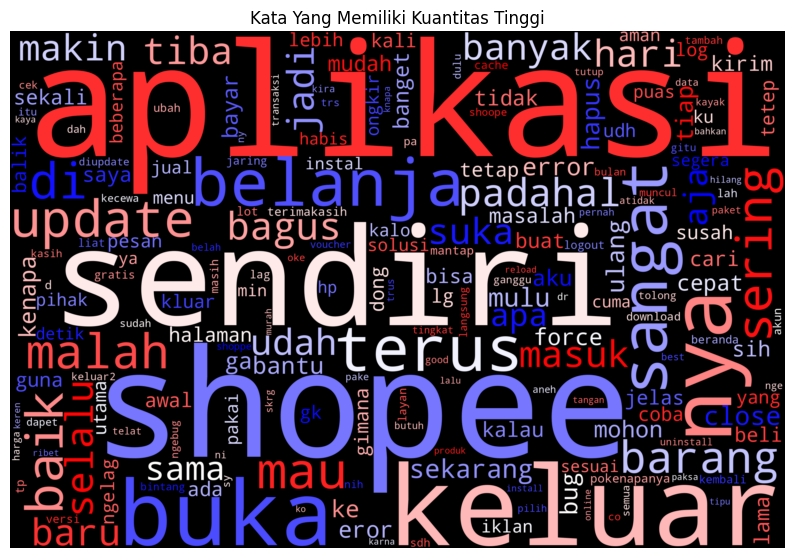

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


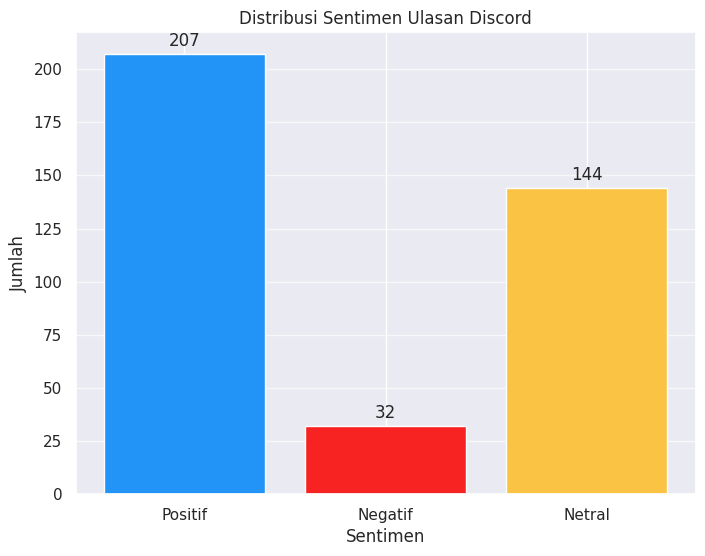

In [36]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Discord")


In [37]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,aplikasi jelas bukak malah keluar sendiri,the application is clear to open its own exit,Positif
1,shoppe di buka terus keluar sendiri min,shoppe is open. Keep coming out on your own. Min.,Positif
2,apa cuma aja buka shoee sering kepentall dong ...,"fontcolor="" # FFFF00""whatjustnotshoee fontcolo...",Positif
3,semenjak update makin banyak bug baru masuk 10...,"Since the update, more bugs have just come in....",Positif
4,payah mau belanja aplikasi nya sekarang suka c...,"fontcolor="" # FFFF00""stupid wantto buythe app ...",Negatif
...,...,...,...
377,sekarang aplikasi shopee tambah aneh masa buka...,Now the shopee apps are getting weirder. Open ...,Negatif
378,makin lama makin jelekkkkk,The longer it gets worse.,Negatif
379,update baru malah sering force close,New updates are often force close,Positif
380,iklan shopee sekarang makin atur kalau iklan y...,Today's shopee ads are getting better. If yout...,Positif


In [38]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,aplikasi jelas bukak malah keluar sendiri,the application is clear to open its own exit,1
1,shoppe di buka terus keluar sendiri min,shoppe is open. Keep coming out on your own. Min.,1
2,apa cuma aja buka shoee sering kepentall dong ...,"fontcolor="" # FFFF00""whatjustnotshoee fontcolo...",1
3,semenjak update makin banyak bug baru masuk 10...,"Since the update, more bugs have just come in....",1
4,payah mau belanja aplikasi nya sekarang suka c...,"fontcolor="" # FFFF00""stupid wantto buythe app ...",0
...,...,...,...
377,sekarang aplikasi shopee tambah aneh masa buka...,Now the shopee apps are getting weirder. Open ...,0
378,makin lama makin jelekkkkk,The longer it gets worse.,0
379,update baru malah sering force close,New updates are often force close,1
380,iklan shopee sekarang makin atur kalau iklan y...,Today's shopee ads are getting better. If yout...,1


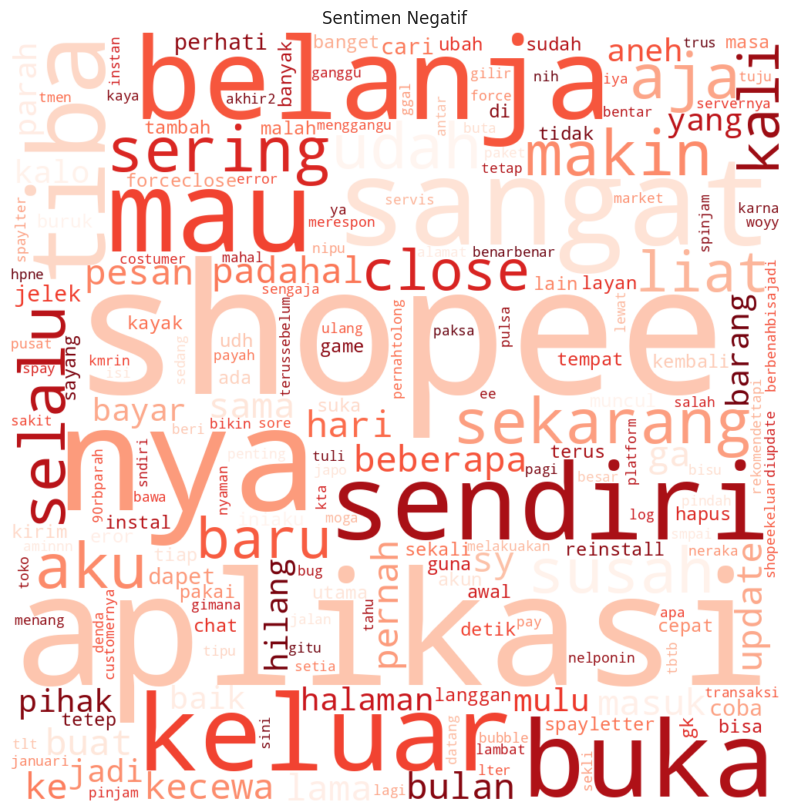

In [39]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

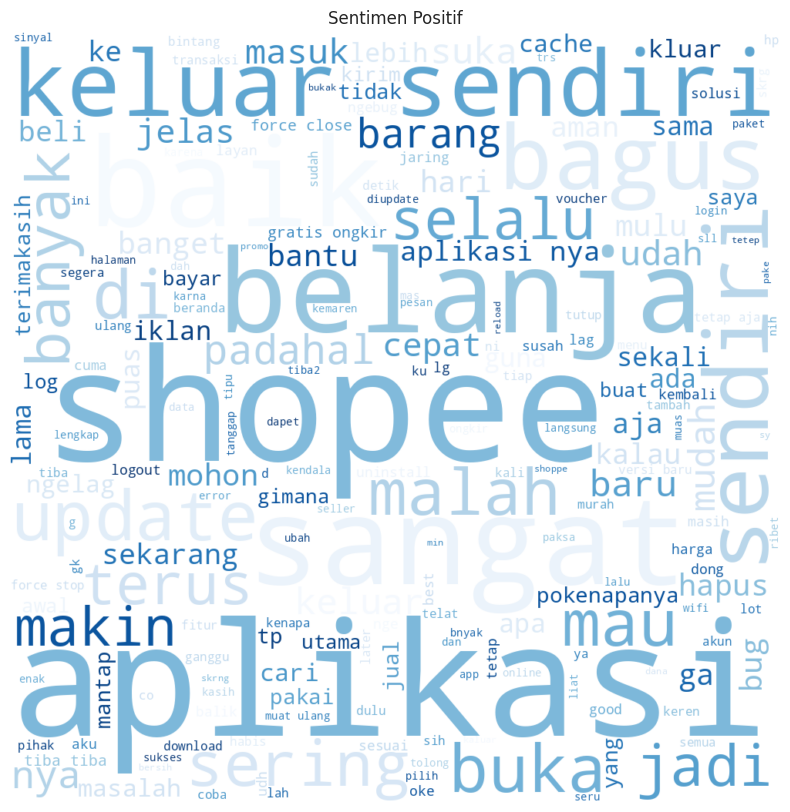

In [40]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [41]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

1    207
0     32
Name: sentimen, dtype: int64

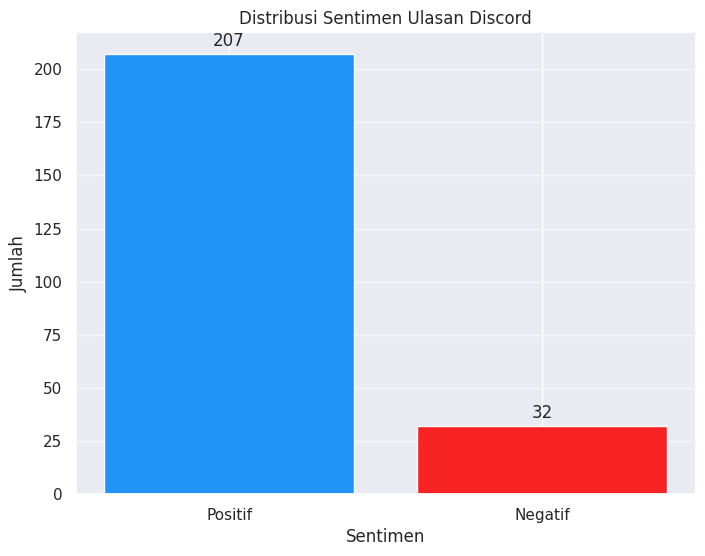

In [42]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Discord")

# **Data Preparation**

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [46]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

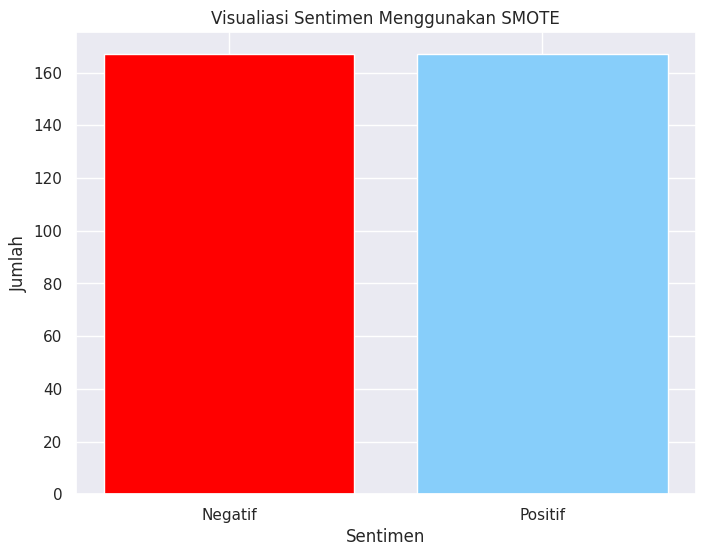

In [47]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [48]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [49]:
y_pred = naive_bayes.predict(X_test_vec)

In [50]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.75

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.17      0.12      0.14         8
     Positif       0.83      0.88      0.85        40

    accuracy                           0.75        48
   macro avg       0.50      0.50      0.50        48
weighted avg       0.72      0.75      0.74        48



# **Testing**


In [51]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : Aplikasi jelek sangat lemot
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [53]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : Bagus, Banyak gratis ongkir dan pengiriman barang cepat
Hasil Analisis Sentimen Untuk Teks Baru : Positif
